<a href="https://colab.research.google.com/github/DandyWahyu/Machine_Learning/blob/main/Jobsheet12/JS12_TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 12 - Optical Character Recognition (OCR)
Dandy Wahyu Syahputra

2141720002

TI - 3A

11

## Tugas Praktikum


In [1]:
# Instalasi
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,765 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
# Import Data
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMG_DIR = '/content/drive/MyDrive/Colab Notebooks/dataset/images-ocr/images/'

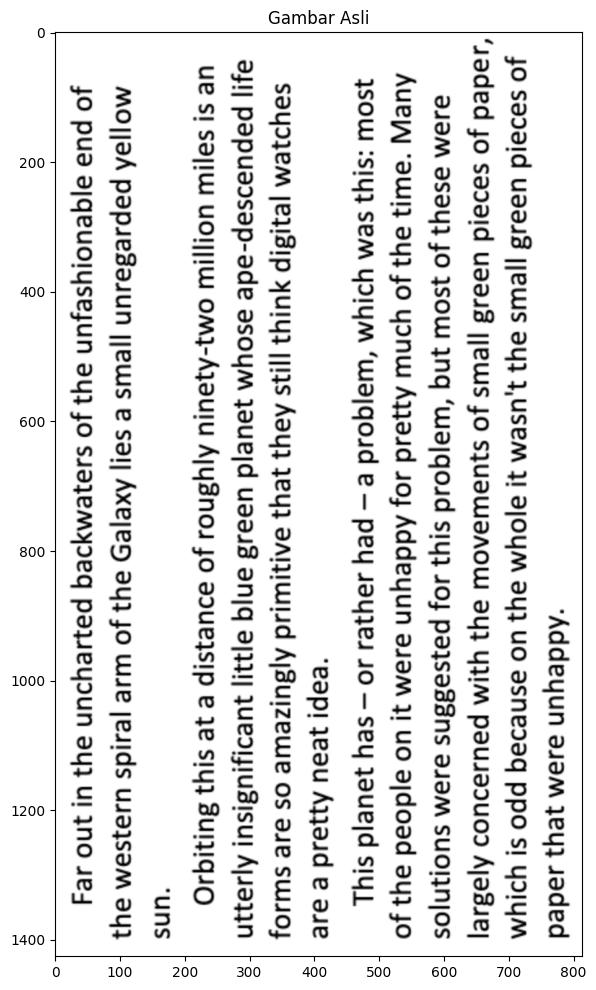

In [6]:
# Membaca gambar dari direktoti
image = cv2.imread(IMG_DIR + '/hitchhikers-rotated.png')

# OpenCV reads images in BGR format, so we need to convert it to RGB for displaying with Matplotlib
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('Gambar Asli')
plt.show()


In [7]:
# Use pytesseract to get text orientation and script
osd = pytesseract.image_to_osd(rgb_img)

# Use regular expressions to extract angle and script information
angle_match = re.search('(?<=Rotate: )\d+', osd)
script_match = re.search('(?<=Script: )\w+', osd)

# Check if matches were found
if angle_match:
    angle = angle_match.group(0)
    print("Angle: ", angle)
else:
    print("Angle not found.")

if script_match:
    script = script_match.group(0)
    print("Script: ", script)
else:
    print("Script not found.")

Angle:  90
Script:  Latin


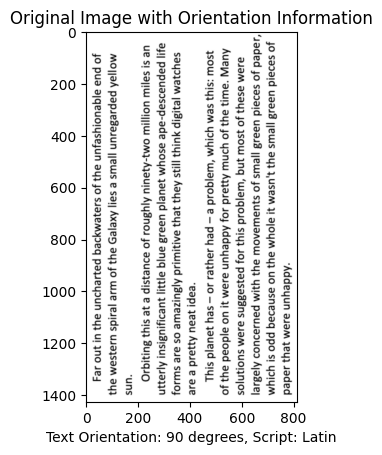

In [8]:
# Display the original image with orientation information
plt.imshow(rgb_img)
plt.title('Original Image with Orientation Information')
plt.xlabel(f"Text Orientation: {angle} degrees, Script: {script}")
plt.show()

In [10]:
from PIL import Image
import os

def rotate_image(image_path, degrees):
    # Open the image
    original_image = Image.open(image_path)

    # Rotate the image
    rotated_image = original_image.rotate(degrees, expand=True)

    # Get the base filename (without extension) from the original image path
    base_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Define the path for saving the rotated image
    save_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset/images-ocr/images', f'{base_filename}_rotated.png')

    # Save the rotated image
    rotated_image.save(save_path)

    # Return the rotated image
    return rotated_image

# Example usage:
image_path = '/content/drive/MyDrive/Colab Notebooks/dataset/images-ocr/images/hitchhikers-rotated.png'
rotated_image = rotate_image(image_path, -90)

# Show the rotated image
rotated_image.show()

In [13]:
import pytesseract
from PIL import Image

# Baca gambar yang sudah diputar
rotated_image = Image.open('/content/drive/MyDrive/Colab Notebooks/dataset/images-ocr/images/hitchhikers-rotated_rotated.png')

# Ekstraksi teks menggunakan Tesseract OCR
text = pytesseract.image_to_string(rotated_image)

# Tampilkan teks hasil ekstraksi
print(text)


Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

